In [2]:
%load_ext autoreload
%autoreload 2

Goal :

- New column → sucess/fail ratio → which articles have high success, high failure. 
- color gradient based on success, failure. 
- Correlation categories, successes failures. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from itertools import chain
from collections import Counter

from src.data.some_dataloader import *

In this notebook we will: 
- find how often each article is used in the Wikispeedia game (i.e. how many times each article was clicked on)
- find articles that are most/least used 
- link each article to its category 
- find most used categories

# Import data 

In [4]:
articles = load_articles_dataframe()
categories = load_categories_dataframe()
finished_paths = load_path_finished_dataframe()
unfinished_paths = load_path_unfinished_distance_dataframe()

In [5]:
articles

,articles
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


In [6]:
categories

,articles,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


In [7]:
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [8]:
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


# Usage of articles

In [9]:
paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])

paths_merged = paths.apply(lambda row: row.split(';'))

clicks_list = paths_merged.values.flatten().tolist()
clicks_list = list(chain.from_iterable(clicks_list))

print(f'there are {len(clicks_list)} clicks in the whole whikispeedia dataset (both finished and unfinished paths)')

there are 476073 clicks in the whole whikispeedia dataset (both finished and unfinished paths)


In [10]:
article_list = list(articles['articles'])

# count number of occurences of each article
counts = Counter(clicks_list)
occurences = {item: counts[item] for item in article_list}

df_articles_count = pd.DataFrame(list(occurences.items()), columns = ['articles', 'click_count']).set_index('articles') # df containing the click counts for each article
df_articles_count.index.name = None
df_articles_count

,click_count
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,0
%C3%85land,4
%C3%89douard_Manet,7
%C3%89ire,13
%C3%93engus_I_of_the_Picts,0
...,...
Zionism,27
Zirconium,34
Zoroaster,20
Zuid-Gelders,10


### Compute success/failure ratio

success_ratio = $\frac{Succesful Clicks}{Total Clicks}$ 

failre_ratio = $\frac{Failure Clicks}{Total Clicks}$ 


In [11]:
# extract articles from the finished paths and put them in a list as new column
finished_paths['articles'] = {} 
finished_paths['articles'] = finished_paths['path'].astype(str).str.split(';')
finished_paths
        

,hashedIpAddress,timestamp,durationInSec,path,rating,articles
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,"[14th_century, 15th_century, 16th_century, Pac..."
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,"[14th_century, Europe, Africa, Atlantic_slave_..."
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,"[14th_century, Niger, Nigeria, British_Empire,..."
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,"[14th_century, Renaissance, Ancient_Greece, Gr..."
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,"[14th_century, Italy, Roman_Catholic_Church, H..."
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,"[Yagan, Ancient_Egypt, Civilization]"
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent..."
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,"[Yagan, Australia, England, France, United_Sta..."
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,"[Yarralumla%2C_Australian_Capital_Territory, A..."


In [12]:
# do the same for the unfinished paths
unfinished_paths['articles'] = {}
unfinished_paths['articles'] = unfinished_paths['path'].astype(str).str.split(';')
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type,articles
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,[Obi-Wan_Kenobi]
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout,[Julius_Caesar]
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,"[Malawi, Democracy, Alexander_the_Great]"
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,[Paraguay]
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,"[Paraguay, Bolivia]"
...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,"[Franz_Kafka, Tuberculosis, World_Health_Organ..."
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart,[Modern_history]
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,"[Computer_programming, Linguistics, Culture, P..."
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,"[Jamaica, United_Kingdom, World_War_II, Battle..."


In [13]:
from collections import Counter

# flatten list of articles from all paths into a single list
all_articles = [article for sublist in finished_paths['articles'] for article in sublist]

article_counts = Counter(all_articles)

article_counts_df = pd.DataFrame(article_counts.items(), columns=['article', 'count']).sort_values(by='count', ascending=False).reset_index(drop=True)

article_counts_df


,article,count
0,<,20561
1,United_States,8896
2,Europe,4362
3,United_Kingdom,3904
4,England,3332
...,...,...
4165,Introduction_to_special_relativity,1
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1
4168,Colditz_Castle,1


#### Considering all clicks 

In [14]:
all_articles = [article for sublist in finished_paths['articles'] for article in sublist]
total_counts = Counter(all_articles)

successful_articles = [
    article for sublist in finished_paths['articles'] for article in sublist
]
successful_counts = Counter(successful_articles)


article_data_s = [
    {
        'article': article,
        'click_count': total_counts[article],
        'success_count': successful_counts[article],
        'success_ratio': successful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

success_ratios_df = pd.DataFrame(article_data_s).sort_values(by='click_count', ascending=False).reset_index(drop=True)
success_ratios_df


,article,click_count,success_count,success_ratio
0,<,20561,20561,1.0
1,United_States,8896,8896,1.0
2,Europe,4362,4362,1.0
3,United_Kingdom,3904,3904,1.0
4,England,3332,3332,1.0
...,...,...,...,...
4165,Introduction_to_special_relativity,1,1,1.0
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,1,1.0
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,1,1.0
4168,Colditz_Castle,1,1,1.0


#### Getting Unique Clicks in paths.

If player passes 3 times by 'England' article, it should only be counted once in the successful/uns

In [15]:
def get_unique_counts(paths):
    unique_counts = Counter()
    for path_articles in paths['articles']:
        unique_articles = set(path_articles)
        unique_counts.update(unique_articles)
    return unique_counts


successful_unique_counts = get_unique_counts(finished_paths[finished_paths['rating'].notna()])

# calculate differences for successful paths
article_data_s_unique = [
    {
        'article': article,
        'total_click_count': total_counts[article],
        'unique_success_count': successful_unique_counts[article],
        'duplicates_in_success': total_counts[article] - successful_unique_counts[article]
    }
    for article in total_counts
]

success_duplicates_df = pd.DataFrame(article_data_s_unique).sort_values(by='total_click_count', ascending=False)
success_duplicates_df


,article,total_click_count,unique_success_count,duplicates_in_success
39,<,20561,4935,15626
24,United_States,8896,4786,4110
9,Europe,4362,2333,2029
303,United_Kingdom,3904,2189,1715
85,England,3332,1746,1586
...,...,...,...,...
4131,Introduction_to_special_relativity,1,0,1
3756,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,1
4099,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,0,1
3775,Colditz_Castle,1,0,1


In [16]:
unsuccessful_articles = [
    article for sublist in unfinished_paths['articles'] for article in sublist
]
unsuccessful_counts = Counter(unsuccessful_articles)

article_data_f = [
    {
        'article': article,
        'click_count': total_counts[article],
        'failure_count' : unsuccessful_counts[article],
        'failure_ratio': unsuccessful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

unsuccess_ratios_df = pd.DataFrame(article_data_f).sort_values(by='click_count', ascending=False).reset_index(drop=True)
unsuccess_ratios_df


,article,click_count,failure_count,failure_ratio
0,<,20561,12907,0.627742
1,United_States,8896,3553,0.399393
2,Europe,4362,1249,0.286337
3,United_Kingdom,3904,1424,0.364754
4,England,3332,1226,0.367947
...,...,...,...,...
4165,Introduction_to_special_relativity,1,0,0.000000
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,0.000000
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,5,5.000000
4168,Colditz_Castle,1,0,0.000000


In [17]:
all_paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
all_paths_merged = all_paths.apply(lambda row: row.split(';'))

clicks_list = list(chain.from_iterable(all_paths_merged.values.tolist()))
total_click_counts = Counter(clicks_list)

def unique_click_counter(paths):
    unique_counts = Counter()
    for path in paths:
        unique_articles = set(path.split(';')) 
        unique_counts.update(unique_articles)
    return unique_counts

successful_unique_counts = unique_click_counter(finished_paths["path"])
unsuccessful_unique_counts = unique_click_counter(unfinished_paths["path"])

data = []

for article in article_list:
    total_click_count = total_click_counts[article]
    unique_success_count = successful_unique_counts[article]
    unique_failure_count = unsuccessful_unique_counts[article]
    
    # calc unique total click count (unique success + unique failure)
    unique_click_count = unique_success_count + unique_failure_count
    
    # calc ratios based on both total and unique counts
    success_ratio_total = successful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    failure_ratio_total = unsuccessful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    
    success_ratio_unique = unique_success_count / unique_click_count if unique_click_count > 0 else 0
    failure_ratio_unique = unique_failure_count / unique_click_count if unique_click_count > 0 else 0

    data.append({
        'article': article,
        'total_click_count': total_click_count,
        'unique_click_count': unique_click_count,
        'unique_success_count': unique_success_count,
        'unique_failure_count': unique_failure_count,
        'success_ratio_total': success_ratio_total,
        'failure_ratio_total': failure_ratio_total,
        'success_ratio_unique': success_ratio_unique,
        'failure_ratio_unique': failure_ratio_unique
    })


df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index(drop=True)
df_articles_count  

,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
1,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
2,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
3,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
4,Earth,4216,4144,3176,968,0.753321,0.229602,0.766409,0.233591
...,...,...,...,...,...,...,...,...,...
4599,History_of_Portugal_%281777%E2%80%931834%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4600,History_of_Poland_%281945%E2%80%931989%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,History_of_Northwest_Territories_capital_cities,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,History_of_Miami%2C_Florida,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [18]:
# add "<" manually if it is not present
if "<" not in [entry['article'] for entry in data]:
    data.append({
        'article': "<",
        'total_click_count': total_click_counts.get("<", 0),
        'unique_click_count': successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0),
        'unique_success_count': successful_unique_counts.get("<", 0),
        'unique_failure_count': unsuccessful_unique_counts.get("<", 0),
        'success_ratio_total': successful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'failure_ratio_total': unsuccessful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'success_ratio_unique': successful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0,
        'failure_ratio_unique': unsuccessful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0
    })

In [19]:
# sort but avoid resetting index until verifying "<" is present
df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index()

df_articles_count

,index,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,4604,<,33468,14196,8995,5201,0.268764,0.155402,0.633629,0.366371
1,4297,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
2,1433,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
3,4293,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
4,1385,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
...,...,...,...,...,...,...,...,...,...,...
4600,558,Benjamin_of_Tudela,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,3241,Photovoltaic_array,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,557,Benjamin_Mountfort,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4603,550,Bench_language,0,0,0,0,0.000000,0.000000,0.000000,0.000000


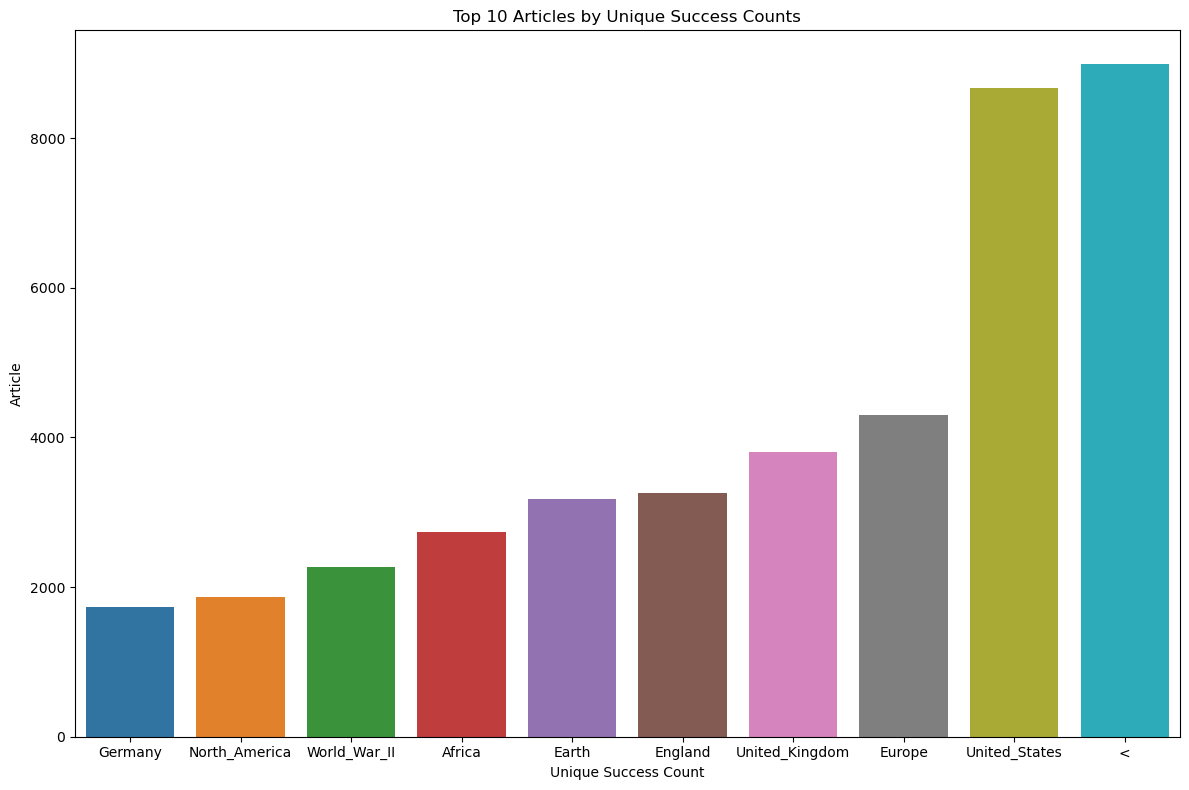

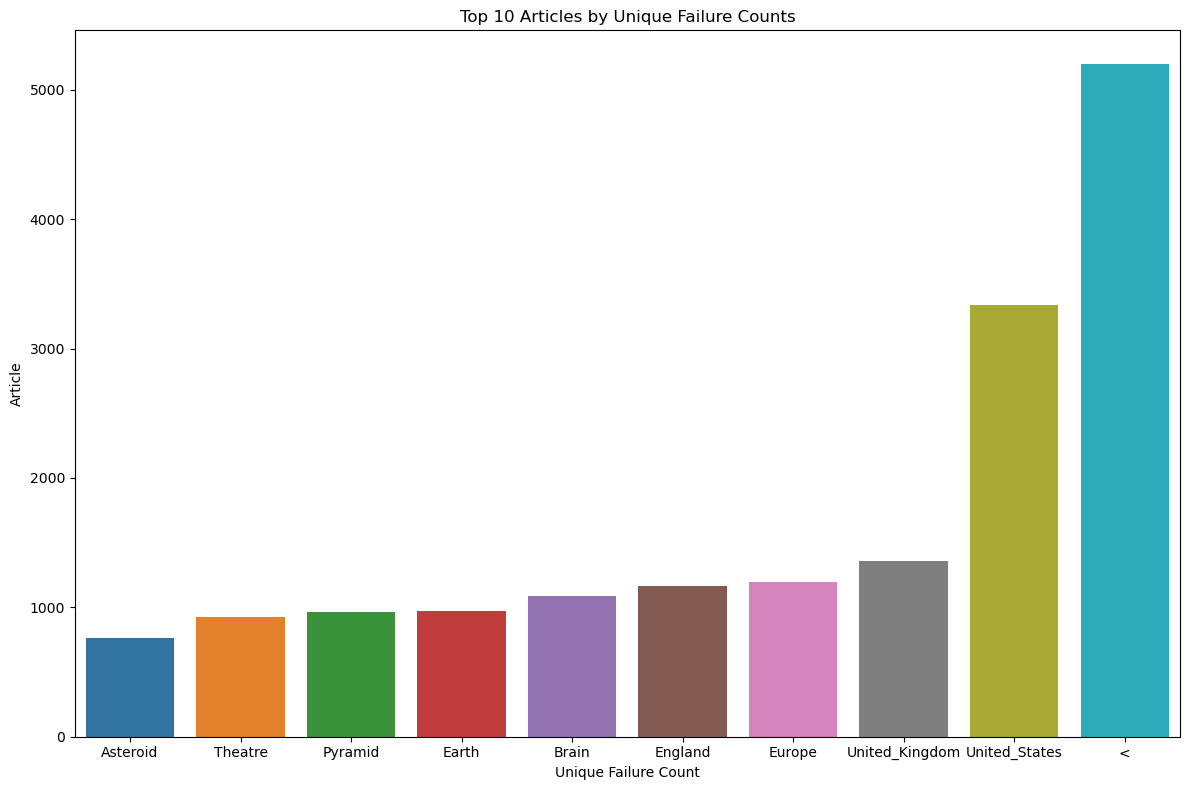

In [20]:
top_success_counts = df_articles_count.nlargest(10, 'unique_success_count')[::-1]
top_failure_counts = df_articles_count.nlargest(10, 'unique_failure_count')[::-1]

# vizzz 1: top 10 articles by success counts
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_success_counts,
    y='unique_success_count',
    x='article', 
    orient='v'
)
plt.title("Top 10 Articles by Unique Success Counts")
plt.xlabel("Unique Success Count")
plt.ylabel("Article")
plt.tight_layout()
plt.show()

# vizz 2 : top 10 articles by unique failure counts
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_failure_counts,
    y='unique_failure_count',
    x='article',
    orient='v'
)
plt.title("Top 10 Articles by Unique Failure Counts")
plt.xlabel("Unique Failure Count")
plt.ylabel("Article")
plt.tight_layout()
plt.show()


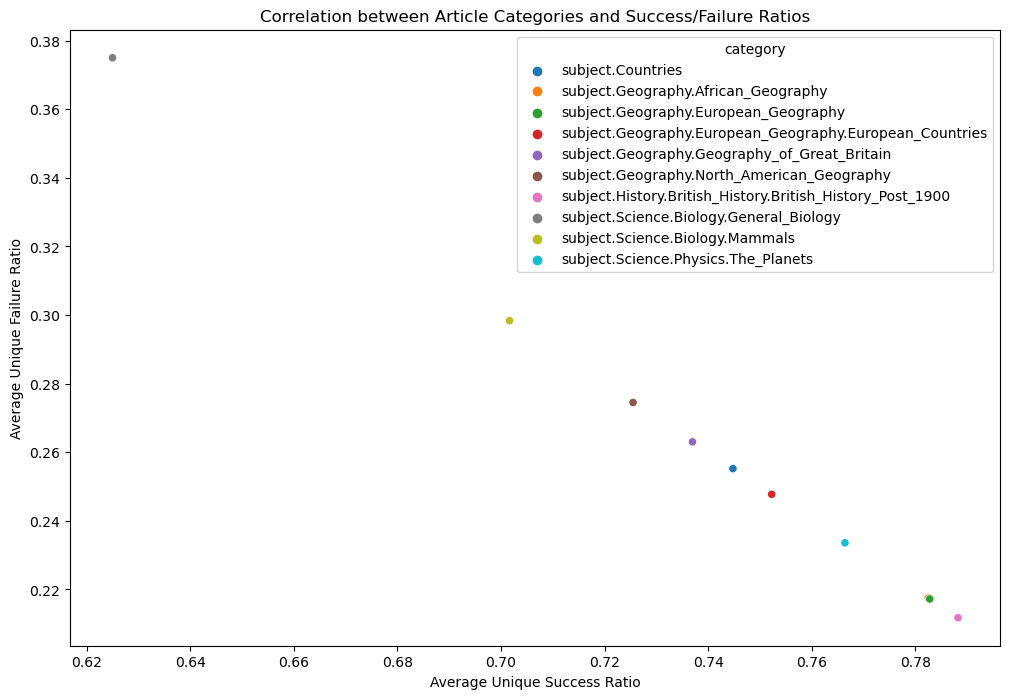

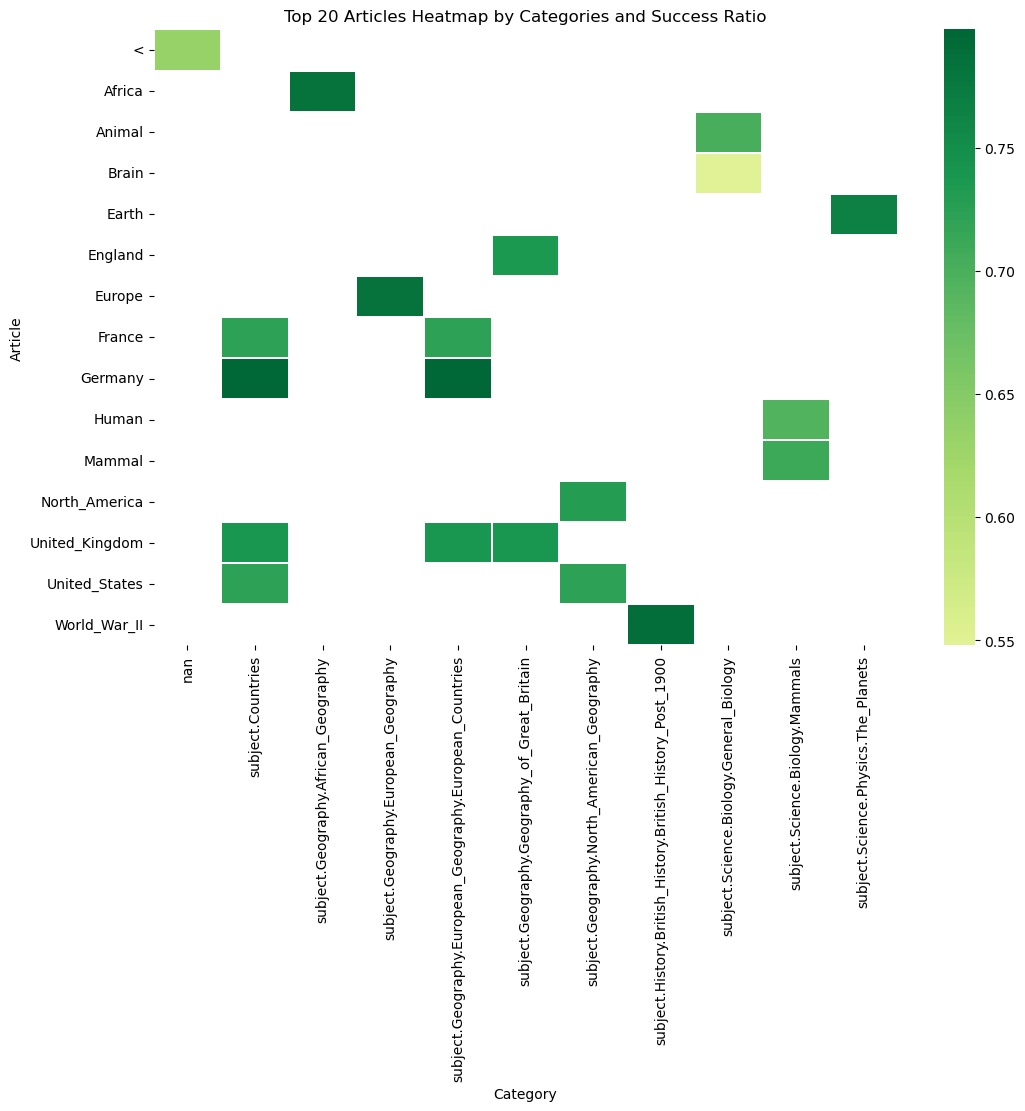

In [21]:
# keep only the top 15 most clicked articles
top_20_articles = df_articles_count.nlargest(15, 'total_click_count')
df_art_and_cat = top_20_articles.merge(categories, left_on='article', right_on='articles', how='left')

# drop extra 'articles' column resulting from the merge
df_art_and_cat = df_art_and_cat.drop(columns=['articles'])

category_grouped = df_art_and_cat.groupby('category').agg({
    'success_ratio_unique': 'mean',
    'failure_ratio_unique': 'mean'
}).reset_index()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=category_grouped, x='success_ratio_unique', y='failure_ratio_unique', hue='category', legend=True)
plt.xlabel("Average Unique Success Ratio")
plt.ylabel("Average Unique Failure Ratio")
plt.title("Correlation between Article Categories and Success/Failure Ratios")
plt.show()

plt.figure(figsize=(12, 8))
heatmap_df = df_art_and_cat.pivot(index='article', columns='category', values='success_ratio_unique')
sns.heatmap(heatmap_df, cmap="RdYlGn", center=0.5, linewidths=0.1)
plt.title("Top 20 Articles Heatmap by Categories and Success Ratio")
plt.xlabel("Category")
plt.ylabel("Article")
plt.show()


### Questions
1. What articles are most likely to cause a player to stop the game? 
2. What makes those articles "dead ends"? What does this have to do with the country of these articles?
3. Does this relate to the number of out articles (links.tsv) 
4. Dernier article des unfinished paths (how many times does it appear? is it a dead end ?)

In [22]:
country_clicks_links = pd.read_csv('data/country_clicks_links.csv')

In [23]:
# 1
# select top articles based on failure ratios and unique failure counts
top_dead_end_articles = df_articles_count.sort_values(by=['failure_ratio_total', 'unique_failure_count'], ascending=False).head(10)
print("Top Dead-End Articles (Most Likely to Cause Players to Stop):")
print(top_dead_end_articles[['article', 'total_click_count', 'failure_ratio_total', 'unique_failure_count']])



Top Dead-End Articles (Most Likely to Cause Players to Stop):
                            article  total_click_count  failure_ratio_total  \
4039               Hurricane_Gloria                  4                  1.0   
4043                Hilda_of_Whitby                  4                  1.0   
4078     Malwa_%28Madhya_Pradesh%29                  4                  1.0   
4090        Eliminative_materialism                  3                  1.0   
4105  San_Diego_and_Arizona_Railway                  3                  1.0   
4111  Lynton_and_Barnstaple_Railway                  2                  1.0   
4127  Battle_of_Smolensk_%281943%29                  2                  1.0   
4129             Richard_O%27Connor                  2                  1.0   
4150               Private_Peaceful                  1                  1.0   
4156            Nadia_Com%C4%83neci                  1                  1.0   

      unique_failure_count  
4039                     4  
4043      

In [24]:
# Filter for articles with low outgoing links and moderate click counts
dead_end_articles = country_clicks_links[(country_clicks_links['click_count'] <= 100)]

# Display top potential dead-end articles
print("Articles Likely to Cause Player to Stop (Dead Ends):")
print(dead_end_articles[['Top_1_name', 'click_count', 'num_links_out']].sort_values(by='click_count', ascending=False).head(10))


Articles Likely to Cause Player to Stop (Dead Ends):
     Top_1_name  click_count  num_links_out
4271      india          100           47.0
2078  greenland          100           12.0
1761      egypt          100           26.0
1144  argentina          100           21.0
2703  guatemala          100           42.0
3760     mexico          100           22.0
2317  australia           99           21.0
1283     russia           99           34.0
2949      nepal           99           37.0
4100     france           99           32.0


In [25]:
# 2
dead_end_countries = dead_end_articles.merge(
    country_clicks_links[['Top_1_name', 'Top_2_name', 'Top_1_count', 'Top_2_count']], 
    left_on='Top_1_name', right_on='Top_1_name', how='inner'
)


unique_dead_end_countries = dead_end_countries.sort_values(
    by=['Top_1_name', 'click_count'], ascending=False
).drop_duplicates(subset=['Top_1_name'])


print("Unique Country-related Dead End Articles:")
print(unique_dead_end_countries[['Top_1_name', 'Top_1_count_x', 'click_count', 'num_links_out', 'Top_2_name_y', 'Top_1_count_y']].head(10))


Unique Country-related Dead End Articles:
            Top_1_name  Top_1_count_x  click_count  num_links_out  \
897930        zimbabwe           13.0           19           17.0   
896771          zambia          112.0           92           96.0   
897868           yemen          109.0           57          140.0   
896917         vietnam            2.0           52           11.0   
896627       venezuela            2.0           75           23.0   
898358         vanuatu           60.0           27           28.0   
894777      uzbekistan           95.0           48           37.0   
898357         uruguay           76.0           61           25.0   
513927   united states            2.0           98           19.0   
778621  united kingdom            0.0           97           45.0   

       Top_2_name_y  Top_1_count_y  
897930        italy           13.0  
896771          NaN            3.0  
897868     ethiopia            9.0  
896917         iraq            4.0  
896627       

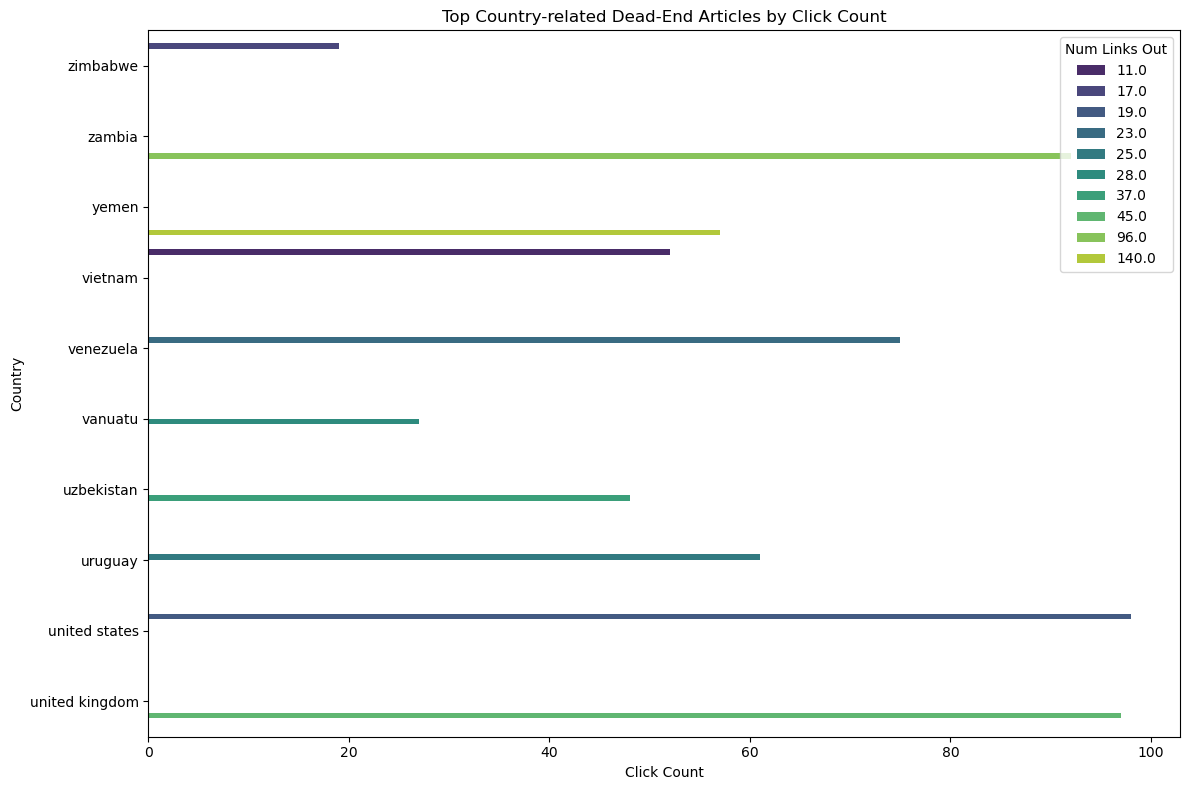

In [34]:
top_unique_dead_end_countries = unique_dead_end_countries.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_unique_dead_end_countries,
    x='click_count',
    y='Top_1_name',
    hue='num_links_out',
    palette='viridis'
)

plt.title("Top Country-related Dead-End Articles by Click Count")
plt.xlabel("Click Count")
plt.ylabel("Country")
plt.legend(title="Num Links Out", loc="upper right")
plt.tight_layout()

plt.show()

In [27]:
outgoing_links_num = country_clicks_links[['num_links_out', 'click_count']]

# calculate the correlation between failure ratio and number of outgoing links
links_correlation = outgoing_links_num.corr().loc['num_links_out', 'click_count']

print("Correlation between failure ratio and number of outgoing links:", links_correlation)

Correlation between failure ratio and number of outgoing links: 0.42065300059547883


In [28]:
# filter to include only numeric columns for correlation calculation
outgoing_links_num_c = dead_end_countries[['num_links_out', 'click_count']]

# calculate the correlation between failure ratio and number of outgoing links
dead_end_links_correlation = outgoing_links_num_c.corr().loc['num_links_out', 'click_count']

print("Correlation between failure ratio and number of outgoing links:", dead_end_links_correlation)

Correlation between failure ratio and number of outgoing links: 0.2802390068835129


In [29]:
# 4
unfinished_paths['last_article'] = unfinished_paths['articles'].apply(lambda x: x[-1])

last_article_counts = unfinished_paths['last_article'].value_counts().reset_index()
last_article_counts.columns = ['last_article', 'count']

# to facilitate merge 
last_article_counts['cleaned_last_article'] = last_article_counts['last_article'].str.replace('_', ' ').str.lower()
# rm underscores and convert to lowercase for matching
dead_end_articles['cleaned_Top_1_name'] = dead_end_articles['Top_1_name'].str.replace('_', ' ').str.lower()

last_dead_end_articles = last_article_counts.merge(
    dead_end_articles, 
    left_on='cleaned_last_article', 
    right_on='cleaned_Top_1_name', 
    how='inner'
)

print("Last Articles in Unfinished Paths (Potential Dead Ends):")
print(last_dead_end_articles[['last_article', 'count', 'Top_1_name', 'num_links_out']].sort_values(by='count', ascending=False))



Last Articles in Unfinished Paths (Potential Dead Ends):
       last_article  count     Top_1_name  num_links_out
0     United_States    558  united states           43.0
270   United_States    558  united states           47.0
268   United_States    558  united states            1.0
267   United_States    558  united states           16.0
266   United_States    558  united states           17.0
...             ...    ...            ...            ...
2705           Mali      1           mali            6.0
2706           Mali      1           mali           15.0
2707           Mali      1           mali            8.0
2708           Mali      1           mali            8.0
2803          Gabon      1          gabon           22.0

[2804 rows x 4 columns]


/var/folders/6l/swjtq9296x5_2ys0mkblyhmh0000gn/T/ipykernel_65630/689285627.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_end_articles['cleaned_Top_1_name'] = dead_end_articles['Top_1_name'].str.replace('_', ' ').str.lower()


In [30]:
# let's get the average of num_links_out

unfinished_paths['last_article'] = unfinished_paths['articles'].apply(lambda x: x[-1])
last_article_counts = unfinished_paths['last_article'].value_counts().reset_index()
last_article_counts.columns = ['last_article', 'count']

last_article_counts['cleaned_last_article'] = last_article_counts['last_article'].str.replace('_', ' ').str.lower()
dead_end_articles['cleaned_Top_1_name'] = dead_end_articles['Top_1_name'].str.replace('_', ' ').str.lower()

last_dead_end_articles = last_article_counts.merge(
    dead_end_articles, 
    left_on='cleaned_last_article', 
    right_on='cleaned_Top_1_name', 
    how='inner'
)

unique_countries_dead_end = last_dead_end_articles.groupby('Top_1_name').agg(
    avg_num_links_out=('num_links_out', 'mean'),
    total_count=('count', 'sum')
).reset_index()

unique_countries_dead_end = unique_countries_dead_end.sort_values(by='total_count', ascending=False)

print("Unique Country-related Dead-End Articles with Average Outgoing Links:")
print(unique_countries_dead_end[['Top_1_name', 'total_count', 'avg_num_links_out']])


Unique Country-related Dead-End Articles with Average Outgoing Links:
         Top_1_name  total_count  avg_num_links_out
170   united states       218736          19.578811
71            india        31464          28.154589
169  united kingdom        26520          18.030303
54           france        19720          25.485294
135          russia         9052          26.056452
..              ...          ...                ...
173         vanuatu            1          28.000000
119            niue            1          15.000000
23           brunei            1          25.000000
98         maldives            1          34.000000
47          eritrea            1          99.000000

[179 rows x 3 columns]


/var/folders/6l/swjtq9296x5_2ys0mkblyhmh0000gn/T/ipykernel_65630/1931045790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_end_articles['cleaned_Top_1_name'] = dead_end_articles['Top_1_name'].str.replace('_', ' ').str.lower()


In [31]:
# 4

# show last articles in unfinished paths
unfinished_paths['last_article'] = unfinished_paths['articles'].apply(lambda x: x[-1])
last_article_counts = unfinished_paths['last_article'].value_counts()

last_article_counts
print("Last Articles in Unfinished Paths (Potential Dead Ends):")
print(last_article_counts)

Last Articles in Unfinished Paths (Potential Dead Ends):
last_article
<                 2221
United_States      558
United_Kingdom     260
England            248
Brain              231
                  ... 
Nobelium             1
Boy_Scout            1
Prospecting          1
Zionism              1
Abbey_Theatre        1
Name: count, Length: 3230, dtype: int64


## Get the count of all articles that come before the "<" and link it with the failure ratio

In [32]:
# get the article immediately before "<" for each path that contains "<"
unfinished_paths['before_back_article'] = unfinished_paths['articles'].apply(
    lambda x: x[x.index('<') - 1] if '<' in x and x.index('<') > 0 else None
)

# drop rows where before_back_article is None (paths that do not contain "<")
unfinished_paths_with_back = unfinished_paths.dropna(subset=['before_back_article'])


before_last_article_counts = unfinished_paths_with_back['before_back_article'].value_counts().reset_index()
before_last_article_counts.columns = ['article_before_back', 'count']


before_last_article_counts['cleaned_article_before_back'] = before_last_article_counts['article_before_back'].str.replace('_', ' ').str.lower()
country_clicks_links['cleaned_Top_1_name'] = country_clicks_links['Top_1_name'].str.replace('_', ' ').str.lower()

# merge to get failure ratio and click count information
before_last_article_analysis = before_last_article_counts.merge(
    country_clicks_links[['cleaned_Top_1_name', 'Top_1_name', 'click_count', 'num_links_out']], 
    left_on='cleaned_article_before_back', 
    right_on='cleaned_Top_1_name', 
    how='inner'
)

sorted_before_last_article_analysis = before_last_article_analysis.sort_values(
    by=['click_count', 'num_links_out'], 
    ascending=[False, True]
)

print("Articles Before '<' with High Failure Ratio (Potential Dead Ends):")
print(sorted_before_last_article_analysis[['article_before_back', 'count', 'Top_1_name', 'click_count', 'num_links_out']])


Articles Before '<' with High Failure Ratio (Potential Dead Ends):
     article_before_back  count      Top_1_name  click_count  num_links_out
463        United_States     96   united states        12449          294.0
3093                Oman      1            oman         5611          159.0
615       United_Kingdom     59  united kingdom         5328          168.0
539       United_Kingdom     59  united kingdom         4558          172.0
2404          Antarctica      5      antarctica         4216          118.0
...                  ...    ...             ...          ...            ...
533       United_Kingdom     59  united kingdom            0            NaN
534       United_Kingdom     59  united kingdom            0            NaN
625       United_Kingdom     59  united kingdom            0            NaN
2043               Japan      8           japan            0            NaN
2059               Japan      8           japan            0            NaN

[3498 rows x 5 colum

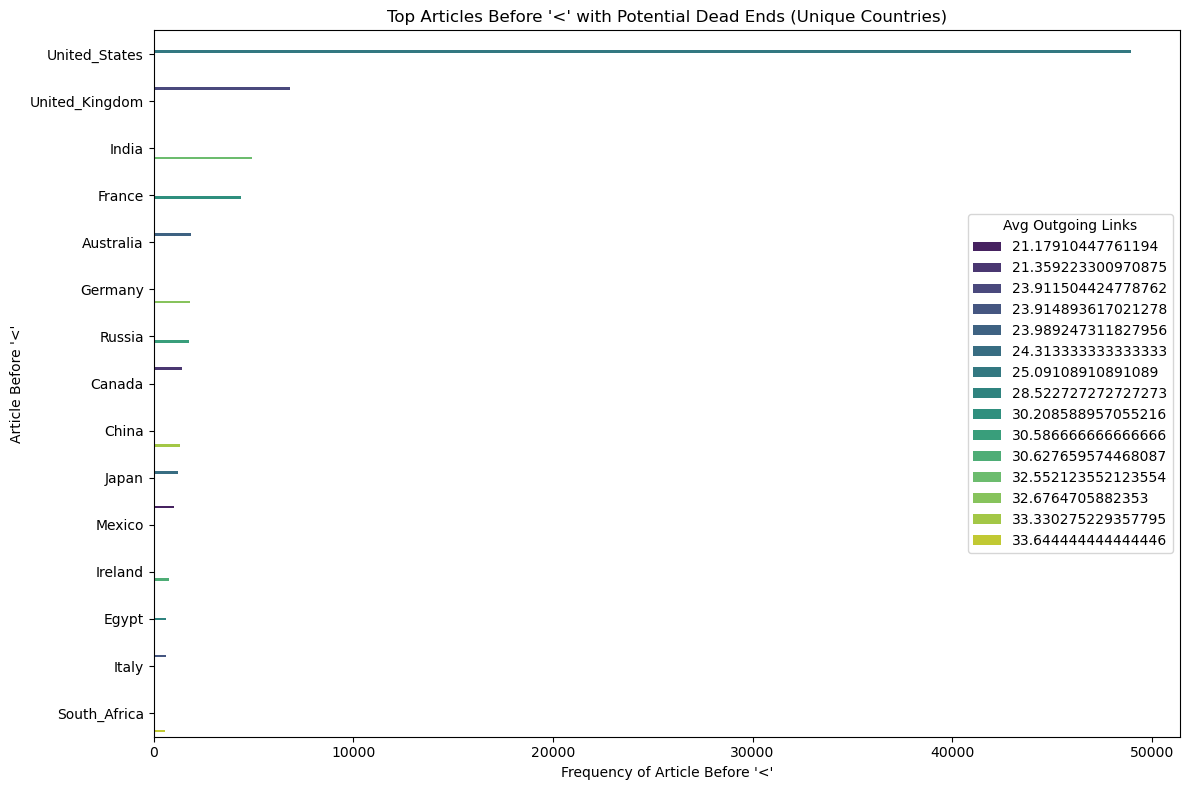

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_articles_before_back_unique = (
    sorted_before_last_article_analysis
    .groupby('article_before_back', as_index=False)
    .agg({'count': 'sum', 'num_links_out': 'mean'})
    .sort_values(by='count', ascending=False)
    .head(15)  # select top 15 unique countries by count
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_articles_before_back_unique, 
    y='article_before_back', 
    x='count', 
    hue='num_links_out', 
    palette='viridis'
)

plt.title("Top Articles Before '<' with Potential Dead Ends (Unique Countries)")
plt.xlabel("Frequency of Article Before '<'")
plt.ylabel("Article Before '<'")
plt.legend(title="Avg Outgoing Links")
plt.tight_layout()

plt.show()
